# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

In this kernel we will be covering various methods to do classification.In this kernel we will be covering following things.

1.Data import,Data Exploration and Vizualization

2.Model Built

3.Model Evaluation

4.Changing the Threshold of the model

5.ROC and AOC for evaluating the model

This kernel is a work in process.If you like the kernel please do vote.       


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval/01Exercise1.csv


# 1.Importing,Data Exploration and Vizualization 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/loan-approval/01Exercise1.csv')
df.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


ch - Credit history 

Status - If the loan is approved or not.

### Summary of Dataset

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 614
Columns  : 6

Features :
     : ['gender', 'married', 'ch', 'income', 'loanamt', 'status']

Missing values    : 88

Unique values :  
 gender       2
married      2
ch           2
income     505
loanamt    203
status       2
dtype: int64


### Displaying Missing Data 

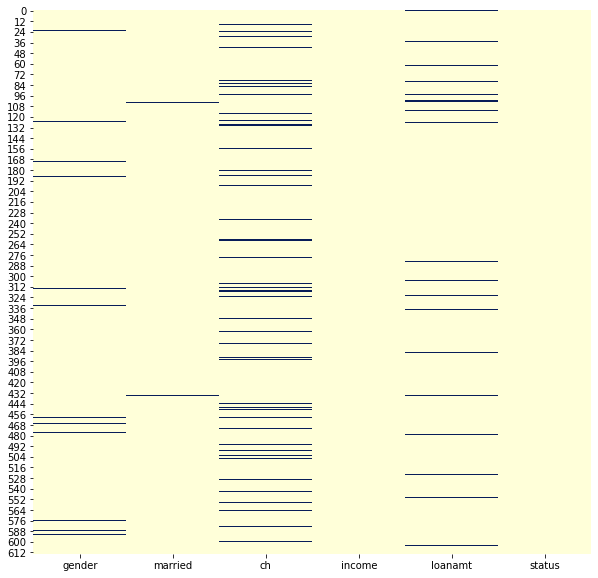

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

In [6]:
df.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [7]:
df.shape

(614, 6)

We can see that there missing values in gender,married,ch(credit history),loan amount colums.We can update the gender column with mode value,credit history with mode and loan amount by mean values.But for our convience we can delete missing rows.

### Dropping the missing values

In [8]:
df_prep =df.copy() 
df_prep.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


### Dropping the missing value 

In [9]:
df_prep = df_prep.dropna()
df_prep.shape

(529, 6)

So the number of rows of data has reduced from 614 to 529 numbers.

### Dropping Unwanted Columns 

In [10]:
df_prep = df_prep.drop(['gender'],axis=1)

### Creating Dummy Variables

As there are only two categories in the data status we need not convert it from object to category type.Else we need to convert from Object to category data type.

In [11]:
df_prep = pd.get_dummies(df_prep,drop_first=True)
df_prep.head()

,ch,income,loanamt,married_Yes,status_Y
1,1.0,4583,128.0,1,0
2,1.0,3000,66.0,1,1
3,1.0,2583,120.0,1,1
4,1.0,6000,141.0,0,1
5,1.0,5417,267.0,1,1


### Normalising Data

In [12]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
df_prep['income'] = sc_X.fit_transform(df_prep[['income']])
df_prep['loanamt'] = sc_X.fit_transform(df_prep[['loanamt']])

### Creating Matrix of Features

In [13]:
df_prep.columns

Index(['ch', 'income', 'loanamt', 'married_Yes', 'status_Y'], dtype='object')

In [14]:
df_prep['status_Y'].value_counts()

1    365
0    164
Name: status_Y, dtype: int64

In [15]:
X = df_prep.drop(labels='status_Y',axis=1)
y = df_prep['status_Y']

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state= 1234,stratify=y)

# 2.Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
#y_pred

# 3.Model Evaluation

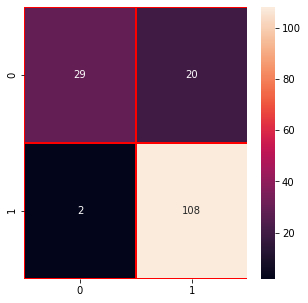

In [18]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
pass

### Accuracy Score 

In [19]:
score = lr.score(X_test,y_test)
print("Accuracy score of the model is:",score)

Accuracy score of the model is: 0.8616352201257862


### Classification Report 

In [20]:
cr =classification_report(y_test,y_pred)
print("Classification Report")
print(cr)

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.59      0.72        49
           1       0.84      0.98      0.91       110

    accuracy                           0.86       159
   macro avg       0.89      0.79      0.82       159
weighted avg       0.87      0.86      0.85       159



From the confusion matrix we can see that we have 20 false positive predictions.This means we would wrongly approve loans in 20 of the cases.This is very bad for the business as these lons wont be returned by the customers.So in the loan approval problem our aim should be to reduce the false positive cases.In our logistic regression the assumption is the threshold probability is 0.5. We can change the value of the threshold in our model and try to twik the model as per our needs.To reduce false positives we have to increase the threshold probability above 0.5

# 4.Adjusting the Probabilities

In [21]:
y_prob = lr.predict_proba(X_test)[:,1]
#y_prob

In y_prob we have the probabilities of the class 1 ( Loan approved).

In [22]:
# Classification based on the probability values

y_new_pred = []
threshold = 0.8 

for i in range(0,len(y_prob)):
    if y_prob[i]> threshold:
        y_new_pred.append(1)
    else:
        y_new_pred.append(0)

### Evaluating the model with threshold 0.8

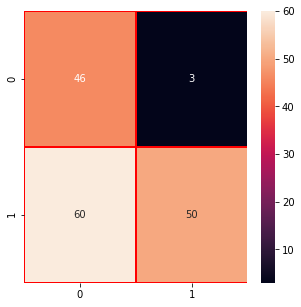

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm1=confusion_matrix(y_test,y_new_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
pass

In [24]:
score = lr.score(X_test,y_new_pred)
print("Accuracy score of the model is:",score)

Accuracy score of the model is: 0.5283018867924528


In [25]:
cr =classification_report(y_test,y_new_pred)
print("Classification Report")
print(cr)

Classification Report
              precision    recall  f1-score   support

           0       0.43      0.94      0.59        49
           1       0.94      0.45      0.61       110

    accuracy                           0.60       159
   macro avg       0.69      0.70      0.60       159
weighted avg       0.79      0.60      0.61       159



Now we can see that by increasing the threshold from 0.5 to 0.8 we have reduced the number of false positive values.Our precision value for class 1 (loan approved) has increased from  0.84 to 0.94.This means our model has possibility of approving 3 bad loans comapared to 20 earlier.

But this increase in the threshold has increased number of false negative( class 0) also reducing the true positive prediction.

Overall accuracy of the model has come down from 0.86 to 0.52. This still could be acceptable to the business or bank as their main agenda is to increase automatiom but simultaneously it needs to be ensured that bad loan approvals ( False positive) numbers are also very low.

# 5.AUC-ROC Curve

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,threshold = roc_curve(y_test,y_prob)

auc = roc_auc_score(y_test,y_prob)     

### Plotting ROC curve

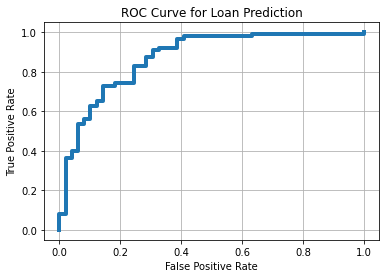

In [27]:
import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Loan Prediction")
plt.grid()

So from the Graph we can see that in order achieve a True positive rate of 1 we have to accept that the false postive rate of 0.4.This means if we want while we try to increase the True positive rate to 1 we will be predicting 40 % more False Positive.We can explain this with the results of confusion matrix from threshold 0.5.

In [28]:
cm

array([[ 29,  20],
       [  2, 108]])

Now we can see that for a threshod of 0.5 we have predicted 108 TP and 2 False Negative.This means we have a very high value of True positive rate close to one. 

But we have predicted 20 False Positive value out of (29 +20) 0 class.Which means we have a false positve rate of 40 %.

### AUC (Area Under the Curve)

In [29]:
auc

0.8716141001855288

So we have acheived 0.87 as the value for area under the curve.Higher the auc value better is our model.If we want to compare two different models we have to compare the auc values for the two models.